# Deep Convolutiona Neural Networks - CIFAR - 10

### Imports

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt
import numpy as np
#Improving CIFAR model with data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### CIFAR-10 is a set of 60k images 32x32 pixels on 3 channels (r,g,b)

In [2]:
IMG_ROWS,IMG_COLS, IMG_CHANNELS = 32,32,3
INPUT_SHAPE = (IMG_ROWS,IMG_COLS, IMG_CHANNELS)

### Model Parameters

In [3]:
BATCH_SIZE = 128
EPOCH = 20
CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = tf.keras.optimizers.RMSprop()

### Loading the data

In [4]:
def load_data(): 
    (x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data() 
    x_train, x_test = x_train/255.0, x_test/255.0
    x_train = x_train.astype('float32') 
    x_test = x_test.astype('float32') 
    # normalize 
    # mean = np.mean(x_train,axis=(0,1,2,3)) 
    # std = np.std(x_train,axis=(0,1,2,3)) 
    # x_train = (x_train-mean)/(std+1e-7) 
    # x_test = (x_test-mean)/(std+1e-7) 
    y_train = tf.keras.utils.to_categorical(y_train,CLASSES) 
    y_test = tf.keras.utils.to_categorical(y_test,CLASSES) 
    return x_train, y_train, x_test, y_test

(x_train, y_train, x_test, y_test) = load_data()


### Image Augmentation

rotation_range is a value in degrees (0-180) for randomly rotating pictures; width_ shift and height_shift are ranges for randomly translating pictures vertically or horizontally; zoom_range is for randomly zooming pictures; horizontal_flip is for randomly flipping half of the images horizontally; and fill_mode is the strategy used for filling in new pixels that can appear after a rotation or a shift.

In [5]:
datagen = ImageDataGenerator(
    rotation_range= 30,
    width_shift_range= 0.2,
    height_shift_range= 0.2,
    horizontal_flip= True
)
datagen.fit(x_train)

### Data Visualization

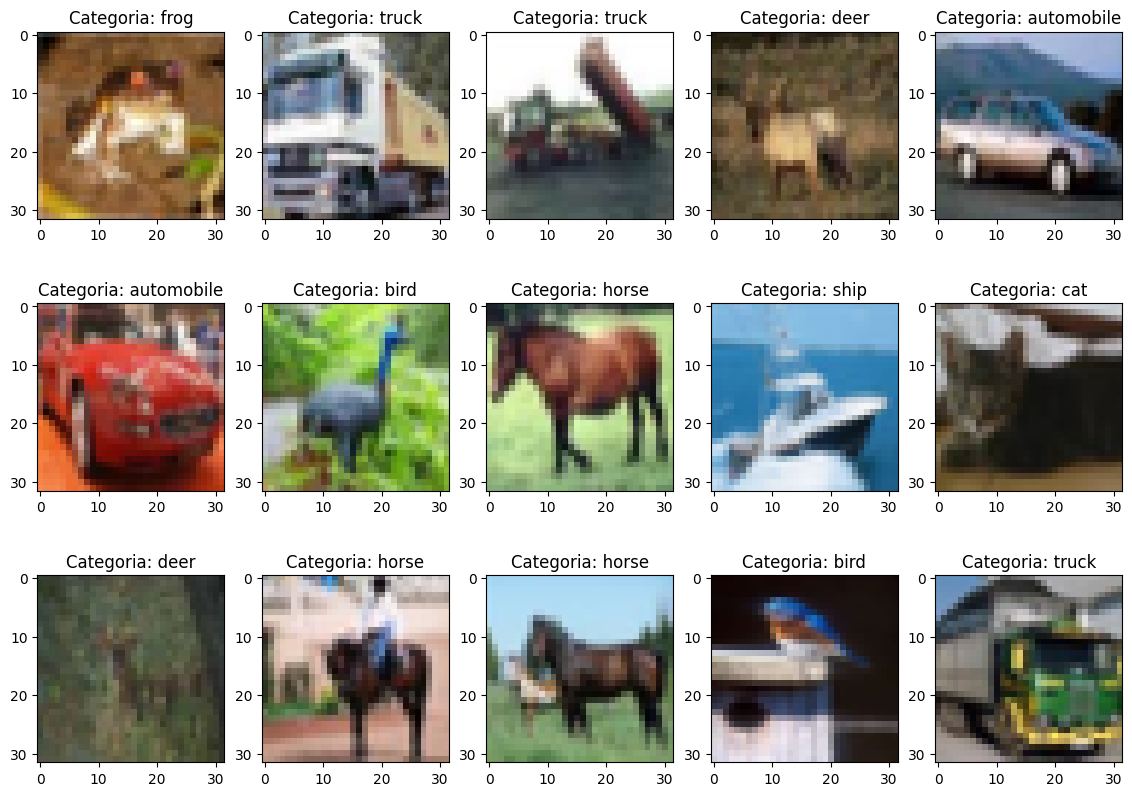

In [6]:
categories = {
    0:"airplane",
    1:"automobile",
    2:"bird",
    3:"cat",
    4:"deer",
    5:"dog",
    6:"frog",
    7:"horse",
    8:"ship",
    9:"truck",
}
def label():
    name_categ = []
    for categ in y_train[0:15]: 
        for i, num in enumerate(categ):
            if num > 0:
                name_categ.append(categories[i])
    return name_categ

fig = plt.figure(figsize=(14,10))
for i in range(15):
    ax = fig.add_subplot(3, 5, i+1)
    image = plt.title(f"Categoria: {list(label())[i]}")
    image = plt.imshow(x_train[i])

### Define the convnet

In [7]:
# First Build
# def build(input_shape, classes):
#     model = models.Sequential()
#     model.add(layers.Convolution2D(32,(3,3),activation='relu',input_shape=input_shape))
#     model.add(layers.MaxPooling2D(pool_size=(2,2)))
#     model.add(layers.Dropout(0.25))
#     model.add(layers.Flatten())
#     model.add(layers.Dense(512, activation='relu'))
#     model.add(layers.Dropout(0.5))
#     model.add(layers.Dense(classes, activation='softmax'))
#     return model


In [8]:
# Improvement
def build_model():
    model = models.Sequential()

    #First Block
    model.add(layers.Conv2D(32,(3,3), padding='same', input_shape=x_train.shape[1:], activation= 'relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.2))

    # Second Block
    model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.3))

    #Third block
    model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.4))

    #dense
    model.add(layers.Flatten())
    model.add(layers.Dense(CLASSES, activation='softmax'))
    return model

### Callbacks and compiling

In [9]:
CALLBACKS = [
    tf.keras.callbacks.TensorBoard(log_dir='./logsCIFAR-Improved')
]
model = build_model()
model.compile(loss='categorical_crossentropy', optimizer = OPTIM, metrics= ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 64)       2

### Fit and evaluate

In [10]:
model.fit(x_train, y_train, batch_size = BATCH_SIZE, epochs=EPOCH, validation_split=VALIDATION_SPLIT,verbose=VERBOSE, callbacks=CALLBACKS)

score = model.evaluate(x_test,y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)

print("\n Test Score: ", score[0])
print("\n Test Accuracy: ", score[1])

Epoch 1/20
313/313 [==============================] - 135s 427ms/step - loss: 1.7545 - accuracy: 0.4135 - val_loss: 2.9794 - val_accuracy: 0.1774
Epoch 2/20
313/313 [==============================] - 154s 491ms/step - loss: 1.1906 - accuracy: 0.5755 - val_loss: 1.9785 - val_accuracy: 0.4267
Epoch 3/20
313/313 [==============================] - 154s 493ms/step - loss: 1.0175 - accuracy: 0.6423 - val_loss: 1.1830 - val_accuracy: 0.5848
Epoch 4/20
313/313 [==============================] - 144s 461ms/step - loss: 0.9103 - accuracy: 0.6809 - val_loss: 1.1349 - val_accuracy: 0.6269
Epoch 5/20
313/313 [==============================] - 149s 475ms/step - loss: 0.8381 - accuracy: 0.7079 - val_loss: 0.9937 - val_accuracy: 0.6693
Epoch 6/20
313/313 [==============================] - 149s 475ms/step - loss: 0.7847 - accuracy: 0.7247 - val_loss: 0.8988 - val_accuracy: 0.6938
Epoch 7/20
313/313 [==============================] - ETA: 0s - loss: 0.7443 - accuracy: 0.7398

### Training with the generated images

In [ ]:
BATCH_SIZE = 64
model.fit(datagen.flow(x_train,y_train,batch_size=BATCH_SIZE), epochs=EPOCH, verbose=VERBOSE, validation_data=(x_test, y_test))

Epoch 1/5
782/782 [==============================] - 187s 238ms/step - loss: 1.2820 - accuracy: 0.5492 - val_loss: 1.0920 - val_accuracy: 0.6283
Epoch 2/5
782/782 [==============================] - 184s 235ms/step - loss: 1.2356 - accuracy: 0.5703 - val_loss: 1.9591 - val_accuracy: 0.5159
Epoch 3/5
782/782 [==============================] - 193s 246ms/step - loss: 1.2074 - accuracy: 0.5803 - val_loss: 1.0018 - val_accuracy: 0.6639
Epoch 4/5
782/782 [==============================] - 31682s 41s/step - loss: 1.1844 - accuracy: 0.5932 - val_loss: 1.0912 - val_accuracy: 0.6373
Epoch 5/5
782/782 [==============================] - 186s 237ms/step - loss: 1.1671 - accuracy: 0.5965 - val_loss: 1.0145 - val_accuracy: 0.6724


### Saving the model

In [ ]:
mode_json = model.to_json()
with open("model.json","w") as json_file:
    json_file.write(mode_json)
model.save_weights('model.h5')

### Test

In [ ]:
scores = model.evaluate(x_test,y_test, batch_size= 128, verbose=1)
print("\n Test Result: %.3f loss: %.3f" % (scores[1]*100, scores[0]))

79/79 [==============================] - 8s 102ms/step - loss: 1.0145 - accuracy: 0.6724

 Test Result: 67.240 loss: 1.014
